In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')
train_data.head(5)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [3]:
train_data.shape

(1101, 20)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [5]:
#checking for null values
train_data.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [6]:
#unique values
columns = train_data.columns
print("The Number of Unique values in each column")
for n in columns:
    w = train_data[n].nunique()
    print('"%s"' % n, 'has', w, 'unique values')

The Number of Unique values in each column
"GP" has 274 unique values
"MIN" has 514 unique values
"PTS" has 392 unique values
"FGM" has 289 unique values
"FGA" has 366 unique values
"FG%" has 480 unique values
"3P Made" has 132 unique values
"3PA" has 216 unique values
"3P%" has 349 unique values
"FTM" has 258 unique values
"FTA" has 285 unique values
"FT%" has 554 unique values
"OREB" has 243 unique values
"DREB" has 281 unique values
"REB" has 306 unique values
"AST" has 279 unique values
"STL" has 219 unique values
"BLK" has 201 unique values
"TOV" has 241 unique values
"Target" has 2 unique values


In [7]:
train_data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [8]:
train_data.groupby('Target').sum()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Target,,,,,,,,,,,,,,,,,,,
0,28621.979801,7761.840504,2771.2806,1067.849022,2493.167445,23348.222795,125.897213,412.368202,10485.817475,512.447307,725.47497,38337.127864,388.222503,828.352147,1213.811459,649.64973,267.732353,137.268511,515.099202
1,36346.000000,10876.200000,4387.8000,1696.900000,3722.800000,24999.500000,140.500000,432.600000,10488.700000,854.900000,1192.30000,39278.800000,666.800000,1304.300000,1970.200000,971.80000,381.200000,241.700000,751.600000


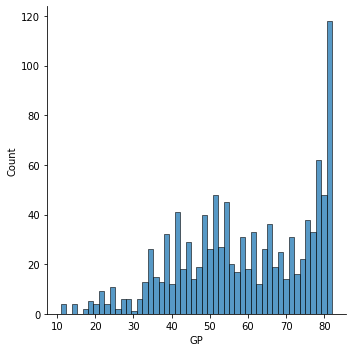

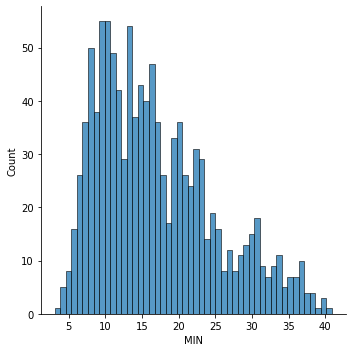

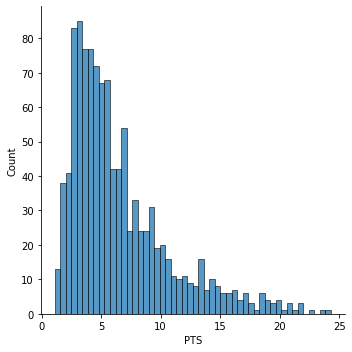

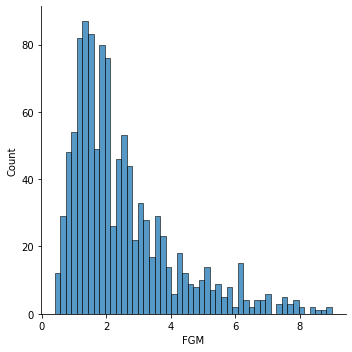

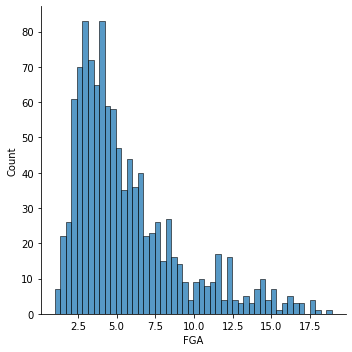

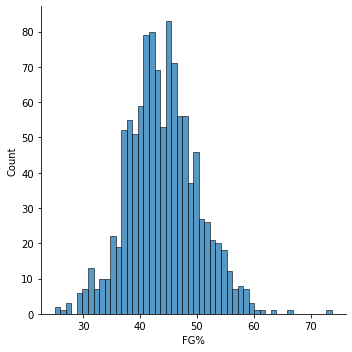

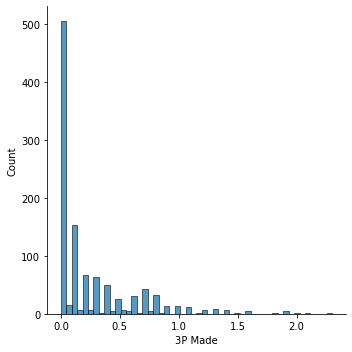

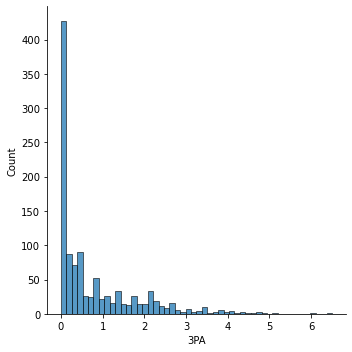

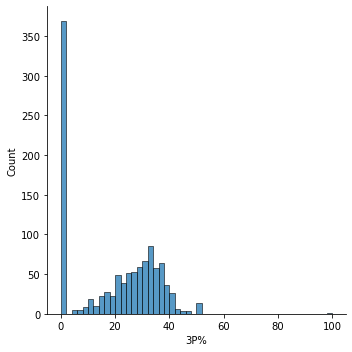

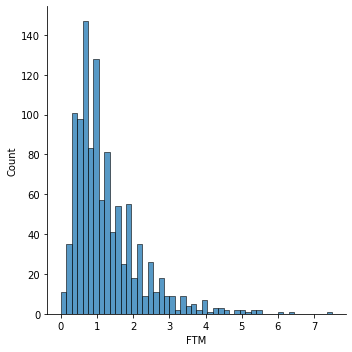

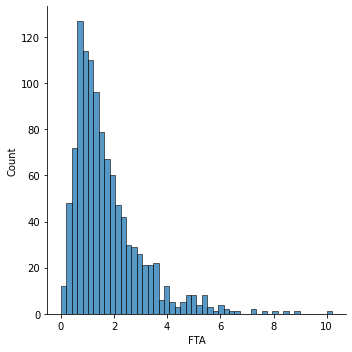

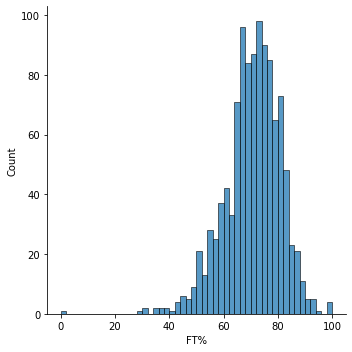

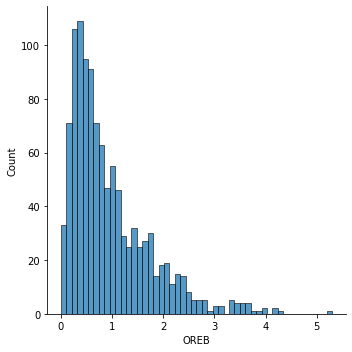

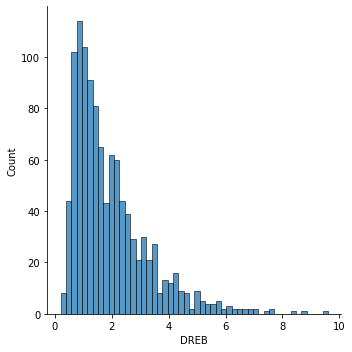

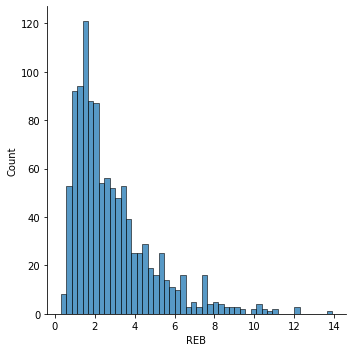

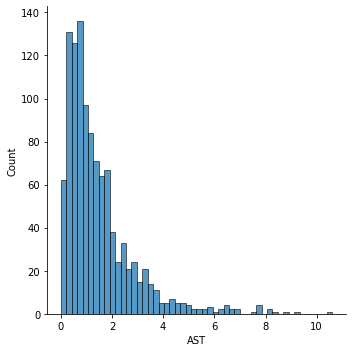

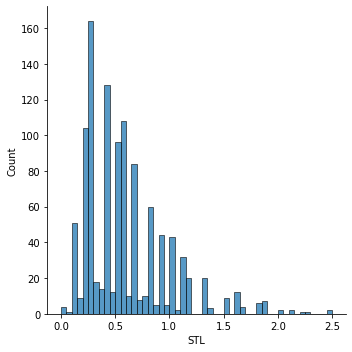

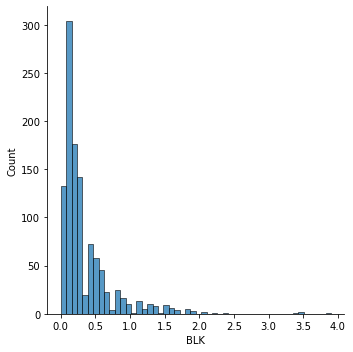

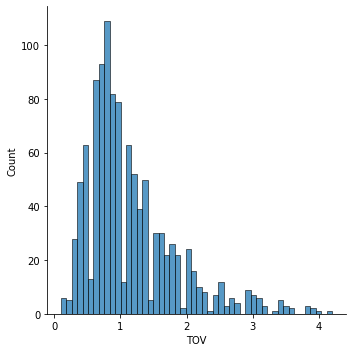

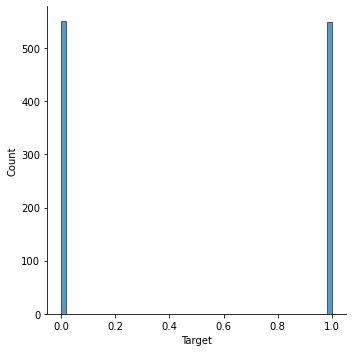

In [9]:
for c in train_data.columns:
    sns.displot(train_data[c],bins=50)

In [10]:
#Correlation of the features with each other
corr = train_data.corr()
corr

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
GP,1.000000,0.596357,0.558244,0.561145,0.537137,0.310895,0.119595,0.106704,0.026493,0.502075,0.490604,0.200039,0.416003,0.478836,0.472796,0.361935,0.455121,0.302524,0.522605,0.410299
MIN,0.596357,1.000000,0.918264,0.905489,0.914114,0.211973,0.390542,0.398589,0.169725,0.811353,0.795711,0.241640,0.586255,0.756072,0.719870,0.625946,0.766311,0.432429,0.830394,0.354152
PTS,0.558244,0.918264,1.000000,0.991033,0.980013,0.272255,0.337452,0.341765,0.147124,0.899845,0.882502,0.246680,0.590605,0.716958,0.696668,0.546482,0.669969,0.433771,0.853030,0.354192
FGM,0.561145,0.905489,0.991033,1.000000,0.979742,0.308350,0.277842,0.282244,0.114917,0.853349,0.843725,0.214689,0.610619,0.723419,0.708522,0.521606,0.650974,0.442781,0.834749,0.356119
FGA,0.537137,0.914114,0.980013,0.979742,1.000000,0.145322,0.382426,0.399330,0.202011,0.832288,0.807849,0.262776,0.514503,0.655417,0.627248,0.587837,0.689307,0.360720,0.848879,0.327988
FG%,0.310895,0.211973,0.272255,0.308350,0.145322,1.000000,-0.304532,-0.360298,-0.376032,0.267298,0.320679,-0.142038,0.527119,0.431919,0.484302,-0.130397,0.040709,0.414445,0.125793,0.252236
3P Made,0.119595,0.390542,0.337452,0.277842,0.382426,-0.304532,1.000000,0.982678,0.619991,0.157143,0.090530,0.310734,-0.221181,0.017703,-0.072795,0.415002,0.353963,-0.157557,0.269701,0.037159
3PA,0.106704,0.398589,0.341765,0.282244,0.399330,-0.360298,0.982678,1.000000,0.612823,0.165934,0.096702,0.321690,-0.237302,0.007024,-0.086081,0.444800,0.379792,-0.172752,0.290051,0.018759
3P%,0.026493,0.169725,0.147124,0.114917,0.202011,-0.376032,0.619991,0.612823,1.000000,0.018112,-0.048118,0.329070,-0.294037,-0.132653,-0.198723,0.296920,0.233972,-0.264620,0.111586,0.001285
FTM,0.502075,0.811353,0.899845,0.853349,0.832288,0.267298,0.157143,0.165934,0.018112,1.000000,0.980388,0.236930,0.604364,0.686171,0.681736,0.473577,0.597443,0.462012,0.811781,0.333098


<AxesSubplot:>

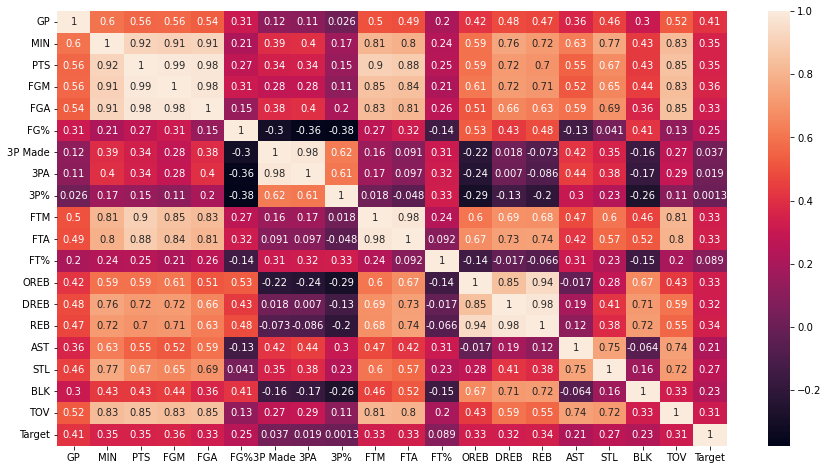

In [11]:
#Plotting the correlation on a heat map
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [12]:
#correlation of the features with the target
cols = train_data.columns
for n in cols:
    f = train_data['Target'].corr(train_data[n])
    print(f'{n} has {f} correlation with the Target')

GP has 0.4102985369935744 correlation with the Target
MIN has 0.3541522890075668 correlation with the Target
PTS has 0.35419205417377825 correlation with the Target
FGM has 0.35611916336423455 correlation with the Target
FGA has 0.3279879393014082 correlation with the Target
FG% has 0.2522359589126728 correlation with the Target
3P Made has 0.03715919950235889 correlation with the Target
3PA has 0.018758649315793 correlation with the Target
3P% has 0.0012846756672932186 correlation with the Target
FTM has 0.333098028316421 correlation with the Target
FTA has 0.3347175488813793 correlation with the Target
FT% has 0.08859735003726187 correlation with the Target
OREB has 0.32930569041867697 correlation with the Target
DREB has 0.3234282537362614 correlation with the Target
REB has 0.3382574205787694 correlation with the Target
AST has 0.21362113964232896 correlation with the Target
STL has 0.26839830811821486 correlation with the Target
BLK has 0.22731223660594044 correlation with the Tar

In [13]:
train_data.Target = train_data.Target.astype('category')
train_data.Target = train_data.Target.cat.codes
train_data.Target.value_counts()

0    551
1    550
Name: Target, dtype: int64

In [14]:
x = train_data.drop(columns='Target')
y = train_data['Target']

In [15]:
#split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state = 101) 

In [16]:
#Standardization
stand_scaler = StandardScaler()

std_xtrain = stand_scaler.fit_transform(x_train)
std_xtrain = pd.DataFrame(std_xtrain,columns=x_train.columns)

std_xtest = stand_scaler.transform(x_test)
std_xtest = pd.DataFrame(std_xtest,columns=x_test.columns)

std_test_data = stand_scaler.transform(test_data)
std_test_data = pd.DataFrame(std_test_data,columns=test_data.columns)

In [17]:
#Random Forest
rrf_class = RandomForestClassifier(random_state=1)
rrf_class.fit(std_xtrain,y_train)
rrf_predictions = rrf_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=rrf_predictions)
print(cnf_mat)
rrf_class_re = (classification_report(y_true=y_test, y_pred=rrf_predictions))
print(rrf_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=rrf_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=rrf_predictions)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=rrf_predictions)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=rrf_predictions)
print( 'F1: {}' .format('%.4f' %f1))

[[48 13]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.77      0.86      0.81        50

    accuracy                           0.82       111
   macro avg       0.82      0.82      0.82       111
weighted avg       0.83      0.82      0.82       111

Accuracy: 0.8198
Precision: 0.7679
Recall: 0.8600
F1: 0.8113


In [18]:
#Extra Tree Classifier
et_class = ExtraTreesClassifier(random_state=1)
et_class.fit(std_xtrain,y_train)
et_predictions = et_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=et_predictions)
print(cnf_mat)
et_class_re = (classification_report(y_true=y_test, y_pred=et_predictions))
print(et_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=et_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=et_predictions)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=et_predictions)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=et_predictions)
print( 'F1: {}' .format('%.4f' %f1))

[[52  9]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        61
           1       0.83      0.86      0.84        50

    accuracy                           0.86       111
   macro avg       0.85      0.86      0.85       111
weighted avg       0.86      0.86      0.86       111

Accuracy: 0.8559
Precision: 0.8269
Recall: 0.8600
F1: 0.8431


In [19]:
#XGB classifier
xgb_class = XGBClassifier(random_state=1)
xgb_class.fit(std_xtrain,y_train)
xgb_predictions = xgb_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predictions, labels=[1,0])
print(cnf_mat)
xgb_class_re = (classification_report(y_true=y_test, y_pred=xgb_predictions))
print(xgb_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=xgb_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=xgb_predictions)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=xgb_predictions)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=xgb_predictions)
print( 'F1: {}' .format('%.4f' %f1))

[[41  9]
 [15 46]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        61
           1       0.73      0.82      0.77        50

    accuracy                           0.78       111
   macro avg       0.78      0.79      0.78       111
weighted avg       0.79      0.78      0.78       111

Accuracy: 0.7838
Precision: 0.7321
Recall: 0.8200
F1: 0.7736


In [20]:
#LIGHTGB classifier
lgb_class = LGBMClassifier(random_state=1)
lgb_class.fit(std_xtrain,y_train)
lgb_predictions = lgb_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=lgb_predictions, labels=[1,0])
print(cnf_mat)
lgb_class_re = (classification_report(y_true=y_test, y_pred=lgb_predictions))
print(lgb_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=lgb_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=lgb_predictions)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=lgb_predictions)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=lgb_predictions)
print( 'F1: {}' .format('%.4f' %f1))

[[42  8]
 [16 45]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        61
           1       0.72      0.84      0.78        50

    accuracy                           0.78       111
   macro avg       0.79      0.79      0.78       111
weighted avg       0.79      0.78      0.78       111

Accuracy: 0.7838
Precision: 0.7241
Recall: 0.8400
F1: 0.7778


In [21]:
log_reg = LogisticRegression()
log_reg.fit(std_xtrain,y_train)
log_predictions = log_reg.predict(std_xtest)
log_mat = confusion_matrix(y_true=y_test, y_pred=log_predictions)
print(log_mat)
lgb_class_re = (classification_report(y_true=y_test, y_pred=lgb_predictions))
print(lgb_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=log_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=log_predictions)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=log_predictions)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=log_predictions)
print( 'F1: {}' .format('%.4f' %f1))

[[45 16]
 [10 40]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        61
           1       0.72      0.84      0.78        50

    accuracy                           0.78       111
   macro avg       0.79      0.79      0.78       111
weighted avg       0.79      0.78      0.78       111

Accuracy: 0.7658
Precision: 0.7143
Recall: 0.8000
F1: 0.7547


In [22]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(std_xtrain,y_train)
    pred_i = knn.predict(std_xtest)
    error_rate.append(np.mean(pred_i != y_test))

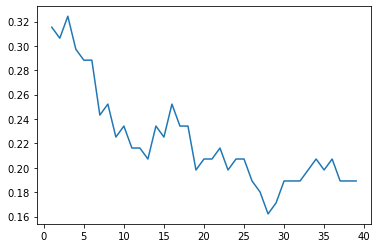

In [23]:
plt.plot(range(1,40),error_rate)

In [24]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(std_xtrain,y_train)
pred = knn.predict(std_xtest)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=pred)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=pred)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=pred)
print( 'F1: {}' .format('%.4f' %f1))

[[54  7]
 [11 39]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        61
           1       0.85      0.78      0.81        50

    accuracy                           0.84       111
   macro avg       0.84      0.83      0.83       111
weighted avg       0.84      0.84      0.84       111

Accuracy: 0.8378
Precision: 0.8478
Recall: 0.7800
F1: 0.8125


In [25]:
param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(std_xtrain,y_train)
grid.best_params_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.505 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.505 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.505 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.505 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.505 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.753 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.692 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.626 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.646 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.697 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.737 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END .................C=100, gamma=0.01;, score=0.712 total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.01;, score=0.596 total time=   0.0s
[CV 4/5] END .................C=100, gamma=0.01;, score=0.652 total time=   0.1s
[CV 5/5] END .................C=100, gamma=0.01;, score=0.667 total time=   0.1s
[CV 1/5] END ................C=100, gamma=0.001;, score=0.768 total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.001;, score=0.636 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.662 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.707 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.737 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.687 total time=   0.0s
[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.641 total time=   0.0s
[CV 4/5] END ...............

{'C': 10, 'gamma': 1}

In [26]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [27]:
pred = grid.predict(std_xtest)

In [28]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[40 21]
 [ 2 48]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        61
           1       0.70      0.96      0.81        50

    accuracy                           0.79       111
   macro avg       0.82      0.81      0.79       111
weighted avg       0.84      0.79      0.79       111



*HYPERPARAMETER TUNING ON THE BEST TWO MODELS TO GAIN A HIGHER ACCURACY*

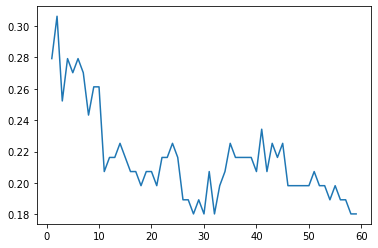

In [30]:
#split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state = 101) 
# Try Standardization with MinMaxScaler

stand_scaler = MinMaxScaler()

std_xtrain = stand_scaler.fit_transform(x_train)
std_xtrain = pd.DataFrame(std_xtrain,columns=x_train.columns)

std_xtest = stand_scaler.transform(x_test)
std_xtest = pd.DataFrame(std_xtest,columns=x_test.columns)

std_test_data = stand_scaler.transform(test_data)
std_test_data = pd.DataFrame(std_test_data,columns=test_data.columns)

error_rate = []
#increasing the range to 60
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(std_xtrain,y_train)
    pred_i = knn.predict(std_xtest)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,60),error_rate)

In [31]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(std_xtrain,y_train)
pred = knn.predict(std_xtest)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print( 'Accuracy: {}' .format('%.4f' % accuracy))
precision = precision_score(y_true=y_test, y_pred=pred)
print( 'Precision: {}' .format('%.4f' % precision))
recall = recall_score(y_true=y_test, y_pred=pred)
print( 'Recall: {}' .format('%.4f' % recall))
f1 = f1_score(y_true=y_test, y_pred=pred)
print( 'F1: {}' .format('%.4f' %f1))

[[52  9]
 [11 39]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.81      0.78      0.80        50

    accuracy                           0.82       111
   macro avg       0.82      0.82      0.82       111
weighted avg       0.82      0.82      0.82       111

Accuracy: 0.8198
Precision: 0.8125
Recall: 0.7800
F1: 0.7959


In [32]:
#split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.027, random_state = 101) 
#Standardizatio7
stand_scaler = StandardScaler()

std_xtrain = stand_scaler.fit_transform(x_train)
std_xtrain = pd.DataFrame(std_xtrain,columns=x_train.columns)

std_xtest = stand_scaler.transform(x_test)
std_xtest = pd.DataFrame(std_xtest,columns=x_test.columns)

std_test_data = stand_scaler.fit_transform(test_data)
std_test_data = pd.DataFrame(std_test_data,columns=test_data.columns)
#Extra Tree Classifier
et_class = ExtraTreesClassifier(random_state=1)
et_class.fit(std_xtrain,y_train)
et_predictions = et_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=et_predictions)
print(cnf_mat)
et_class_re = (classification_report(y_true=y_test, y_pred=et_predictions))
print(et_class_re)
accuracy = accuracy_score(y_true=y_test, y_pred=et_predictions)
print( 'Accuracy: {}' .format('%.4f' % accuracy))

[[13  0]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.76      0.87        17

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30

Accuracy: 0.8667


Extra Tree Classifier gave the highest accuracy so far. Therefore I used Extra Tree Class to predict on the standardized test data

In [33]:
target = et_class.predict(std_test_data)

In [34]:
res = pd.DataFrame(target)
res.index = std_test_data.index
res.columns = ['prediction']
res.to_csv('prediction_results.csv', index=False)

In [35]:
res

,prediction
0,0
1,0
2,0
3,0
4,1
...,...
550,1
551,1
552,1
553,0
